In [1]:
import math
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
#import pandas_datareader as web
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
plt.style.use('fivethirtyeight')

In [2]:
data = pd.read_csv('tesla.csv', index_col=['Date'])
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
29-06-2010,19.000000,25.00,17.540001,23.889999,23.889999,18766300
30-06-2010,25.790001,30.42,23.299999,23.830000,23.830000,17187100
01-07-2010,25.000000,25.92,20.270000,21.959999,21.959999,8218800
02-07-2010,23.000000,23.10,18.709999,19.200001,19.200001,5139800
06-07-2010,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2193 entries, 29-06-2010 to 15-03-2019
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2193 non-null   float64
 1   High       2193 non-null   float64
 2   Low        2193 non-null   float64
 3   Close      2193 non-null   float64
 4   Adj Close  2193 non-null   float64
 5   Volume     2193 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 119.9+ KB


In [4]:
data.shape

(2193, 6)

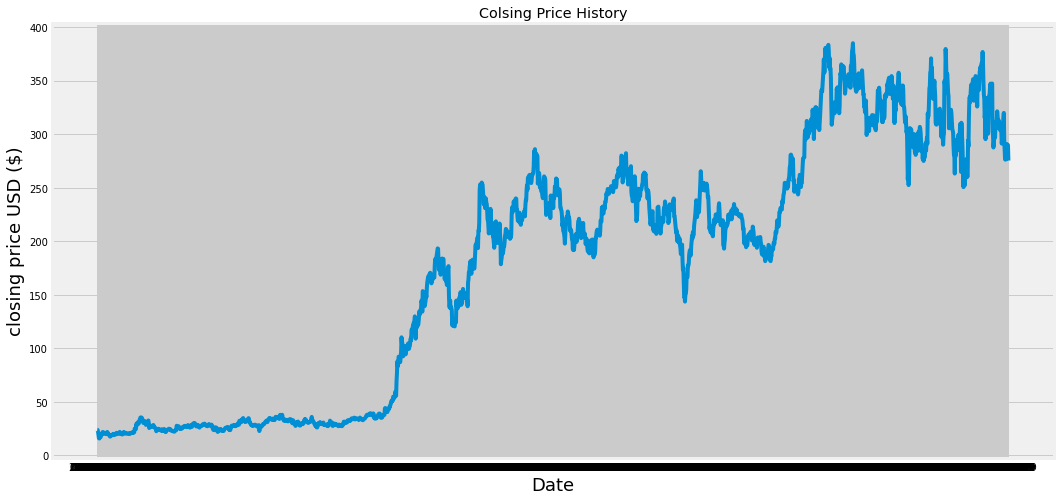

In [5]:
# visualizing the adjusted closing price history

plt.figure(figsize=(16,8))
plt.title('Colsing Price History')
plt.plot(data['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('closing price USD ($)', fontsize=18)
plt.show()

In [6]:
# create a new dataframe with only adj closeing column
t_data = data.filter(['Close'])

# coconver the dataframe to a numpy array
dataset = t_data.values

# Get the number of rows to train the model on
training_data_num = math.ceil(len(dataset) * .8)

print('The total number of our training set is', training_data_num)

The total number of our training set is 1755


In [7]:
# Scaling the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.02191224],
       [0.02174973],
       [0.01668472],
       ...,
       [0.73986996],
       [0.74257852],
       [0.70322317]])

In [8]:
# create the training dataset

train_data = scaled_data[0:training_data_num, :]

#split the data into x_train and y_train
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 61:
        print(x_train)
        print(y_train)
        print(' ')

[array([0.02191224, 0.02174973, 0.01668472, 0.0092091 , 0.00083966,
       0.        , 0.00449621, 0.00433369, 0.0033857 , 0.00633803,
       0.01094258, 0.011078  , 0.01310942, 0.0165493 , 0.01218851,
       0.01197183, 0.01408451, 0.01486999, 0.01394908, 0.01286565,
       0.01332611, 0.01232394, 0.01121344, 0.01386782, 0.01665764,
       0.01478873, 0.0125948 , 0.01026544, 0.01029252, 0.00874865,
       0.00568797, 0.00487541, 0.00682557, 0.00807151, 0.00907367,
       0.00804442, 0.00809859, 0.00893824, 0.01172806, 0.0092091 ,
       0.01110509, 0.01069881, 0.01056338, 0.01102384, 0.0099675 ,
       0.0125948 , 0.01424702, 0.01421993, 0.01283857, 0.01381365,
       0.01329902, 0.0118364 , 0.01332611, 0.01440954, 0.01673889,
       0.013922  , 0.01199892, 0.01424702, 0.01346154, 0.01102384])]
[0.010184179306608886]
 
[array([0.02191224, 0.02174973, 0.01668472, 0.0092091 , 0.00083966,
       0.        , 0.00449621, 0.00433369, 0.0033857 , 0.00633803,
       0.01094258, 0.011078  , 0.

In [9]:
# convert the the train dataset to a numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [10]:
# Reshaping the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_train.shape

(1695, 60, 1)

In [11]:
model = Sequential()

model.add(LSTM(50, return_sequences = True, input_shape =(x_train.shape[1],1)))

model.add(LSTM(50, return_sequences = False))
#model.add(Dropout(0.2))

model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [12]:
# train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1695/1695 [==============================] - 17s 6ms/step - loss: 0.0016


In [13]:
# creating the testing dataset
# create a new array containing scaled values from index 2193

test_data = scaled_data[training_data_num - 60:, :]

# create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_num:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [14]:
# converting to numpy array
x_test = np.array(x_test)


In [15]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [16]:
# Get the models predicted prece value
preds = model.predict(x_test)
preds = scaler.inverse_transform(preds)

In [17]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(preds - y_test)**2)
rmse

2.2710637417817137

In [18]:
# Plotting the data
train = t_data[:training_data_num]
valid = t_data[training_data_num:]

In [19]:
#valid = pd.DataFrame(valid, columns=['Actual val'])
valid['predictions'] = preds

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:
valid.sample(10)

,Close,predictions
Date,,
17-08-2017,351.920013,357.644470
04-12-2018,359.700012,342.722778
20-02-2018,334.769989,321.730530
10-01-2018,334.799988,320.162598
12-06-2018,342.769989,313.185089
09-08-2017,363.529999,344.675018
17-12-2018,348.420013,363.227539
22-05-2018,275.010010,283.794739
14-06-2018,357.720001,328.241913


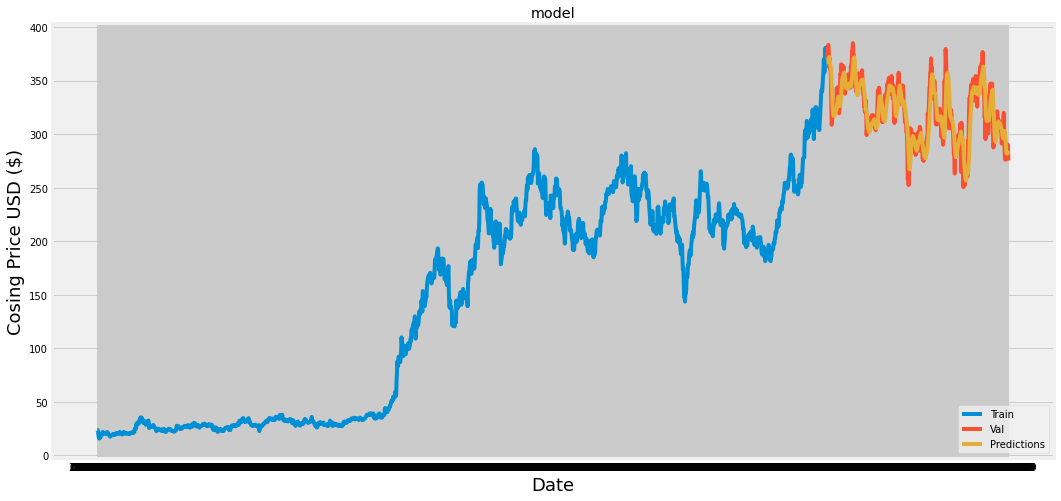

In [21]:
# visualizing the data
plt.figure(figsize=(16,8))
plt.title('model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Cosing Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()